# K Nearest Neighbors

## 1. Iris Dataset

In [1]:
#importing libraries
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('iris.csv',header=None)
data.columns =['sepal-length', 'sepal-width', 'petal-length', 'petal-width','species']
data.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#encoding labels of species

label_encoder = preprocessing.LabelEncoder()
data['species']= label_encoder.fit_transform(data['species'])
data['species'].unique()

array([0, 1, 2])

#### 1.a) Compare all four features distribution in each iris class using boxplots.

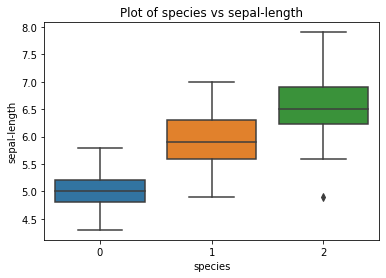

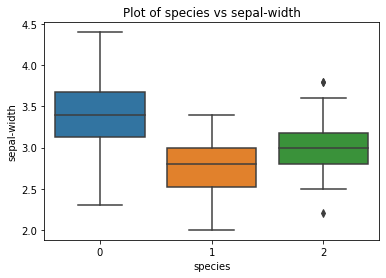

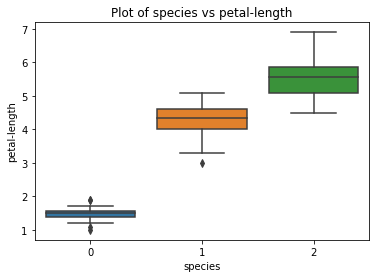

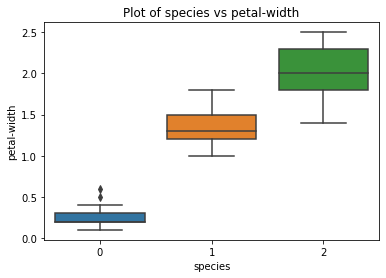

In [4]:
#boxplot to compare all four features distribution in each iris class
sns.boxplot(x="species",y="sepal-length",data=data)
plt.title('Plot of species vs sepal-length')
plt.show()
sns.boxplot(x="species",y="sepal-width",data=data)
plt.title('Plot of species vs sepal-width')
plt.show()
sns.boxplot(x="species",y="petal-length",data=data)
plt.title('Plot of species vs petal-length')
plt.show()
sns.boxplot(x="species",y="petal-width",data=data)
plt.title('Plot of species vs petal-width')
plt.show()

In [5]:
y = data.pop('species')
X = data[['sepal-length', 'sepal-width']]

In [6]:
#Train-test split
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=12)
Xtrain= np.asarray(Xtrain)
ytrain= np.asarray(ytrain)

Xtest= np.asarray(Xtest)
ytest= np.asarray(ytest)

X=np.asarray(X)

Following is the functions for different cases of knn implemented on all three datasets:

In [7]:
# function for calculating euclidean distance
def euclidean_distance(xtest, xtrain):
    return np.sqrt(np.sum((xtest - xtrain)**2))

# function for calculating manhattan distance
def manhattan(xtest, xtrain):
    return sum(abs(xtest - xtrain))

# function for calculating L3 distance
def L3(xtest, xtrain):
    return np.cbrt(np.sum(abs((xtest - xtrain))**3))

class kneighbors:
    def __init__(self, k):
        self.k = k
    def fit(self, Xtrain, ytrain):
        self.Xtrain = Xtrain
        self.ytrain = ytrain
    
    # function for knn using euclidean distance and majority voting 
    def knn(self, x):
        distances = [euclidean_distance(x, i) for i in self.Xtrain]
        indices = np.argsort(distances)[:self.k]
        labels = [self.ytrain[j] for j in indices]
        vote = Counter(labels).most_common(1)
        return vote[0][0]
    
    # function for knn using manhattan distance and majority voting 
    def knnMan(self, x):
        distances = [manhattan(x, i) for i in self.Xtrain]
        indices = np.argsort(distances)[:self.k]
        labels = [self.ytrain[j] for j in indices]
        vote = Counter(labels).most_common(1)
        return vote[0][0]
    
    # function for knn using L3 distance and majority voting 
    def knnL3(self, x):
        distances = [L3(x, i) for i in self.Xtrain]
        indices = np.argsort(distances)[:self.k]
        labels = [self.ytrain[j] for j in indices]
        vote = Counter(labels).most_common(1)
        return vote[0][0]
    
    # function for knn using euclidean distance and weighted distance voting 
    def knnw(self, x):
        weights = [(1/(euclidean_distance(x, i)**2)) for i in self.Xtrain]
        indices = np.argsort(weights)[:self.k]
        labels = [self.ytrain[j] for j in indices]
        vote = Counter(labels).most_common(1)
        return vote[0][0]
    
    #prediction functions for the different cases
    def predict_(self, xtest):
        pred = [self.knn(m) for m in xtest]
        return np.array(pred)
    def predict_w(self, xtest):
        pred = [self.knnw(m) for m in xtest]
        return np.array(pred)
    def predict_M(self, xtest):
        pred = [self.knnMan(m) for m in xtest]
        return np.array(pred)
    def predict_L3(self, xtest):
        pred = [self.knnL3(m) for m in xtest]
        return np.array(pred) 

In [8]:
# fucntion to generate meshGrid
def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy

#### 1.b) Start with k = 1, plot the decision boundary using the first two features (Sepal length and width)

KNN classifier accuracy(k=1):0.800
[[11  1  0]
 [ 0  5  4]
 [ 0  1  8]]


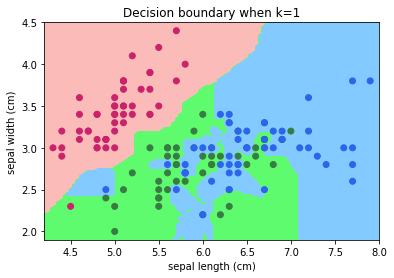

In [9]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))


model1 = kneighbors(k = 1)
model1.fit(Xtrain, ytrain)
ypred1 = model1.predict_(Xtest)
print("KNN classifier accuracy(k=1):{0:.3f}".format(accuracy_score(ytest, ypred1)))
print(confusion_matrix(ytest, ypred1))


Z1 = model1.predict_(np.c_[xx.ravel(), yy.ravel()])
Z1= np.array(Z1)
Z1 = Z1.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z1, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.title('Decision boundary when k=1')

plt.show()

#### 1.c) Perform the prediction using k = 2, 4, 6, 10 and plot the decision boundaries.
#### 1.d) For all cases, report accuracy and confusion matrix

KNN classifier accuracy(k=2):0.800
[[11  1  0]
 [ 0  5  4]
 [ 0  1  8]]


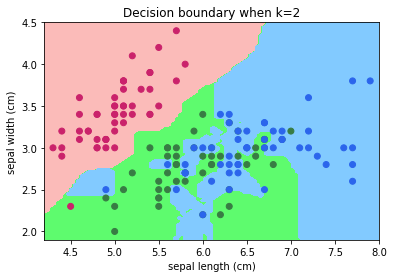

KNN classifier accuracy(k=4):0.800
[[11  1  0]
 [ 0  5  4]
 [ 0  1  8]]


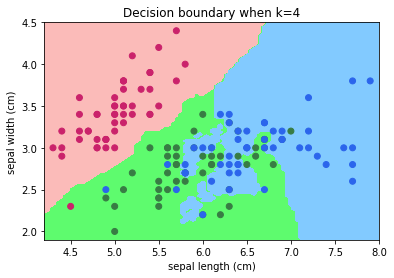

KNN classifier accuracy(k=6):0.767
[[11  1  0]
 [ 0  5  4]
 [ 0  2  7]]


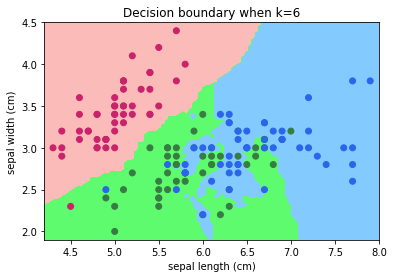

KNN classifier accuracy(k=10):0.867
[[12  0  0]
 [ 0  6  3]
 [ 0  1  8]]


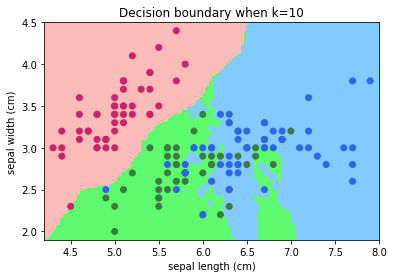

In [10]:
#k=2
model2 = kneighbors(k = 2)
model2.fit(Xtrain, ytrain)
ypred2 = model2.predict_(Xtest)
print("KNN classifier accuracy(k=2):{0:.3f}".format(accuracy_score(ytest, ypred2)))
print(confusion_matrix(ytest, ypred2))


Z2 = model2.predict_(np.c_[xx.ravel(), yy.ravel()])
Z2= np.array(Z2)
Z2 = Z2.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z2, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.title('Decision boundary when k=2')
plt.show()

#-----------------------------------------------------------------------------
#k = 4
model3 = kneighbors(k = 4)
model3.fit(Xtrain, ytrain)
ypred3 = model1.predict_(Xtest)
print("KNN classifier accuracy(k=4):{0:.3f}".format(accuracy_score(ytest, ypred3)))
print(confusion_matrix(ytest, ypred3))


Z3 = model3.predict_(np.c_[xx.ravel(), yy.ravel()])
Z3= np.array(Z3)
Z3 = Z3.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z3, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.title('Decision boundary when k=4')
plt.show()

#----------------------------------------------------------------------------
#k=6
model4 = kneighbors(k = 6)
model4.fit(Xtrain, ytrain)
ypred4 = model4.predict_(Xtest)
print("KNN classifier accuracy(k=6):{0:.3f}".format(accuracy_score(ytest, ypred4)))
print(confusion_matrix(ytest, ypred4))


Z4 = model4.predict_(np.c_[xx.ravel(), yy.ravel()])
Z4= np.array(Z4)
Z4 = Z4.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z4, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.title('Decision boundary when k=6')
plt.show()

#---------------------------------------------------------------------------------
#k=10
model5 = kneighbors(k = 10)
model5.fit(Xtrain, ytrain)
ypred5 = model5.predict_(Xtest)
print("KNN classifier accuracy(k=10):{0:.3f}".format(accuracy_score(ytest, ypred5)))
print(confusion_matrix(ytest, ypred5))


Z5 = model5.predict_(np.c_[xx.ravel(), yy.ravel()])
Z5= np.array(Z5)
Z5 = Z5.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z5, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.title('Decision boundary when k=10')

plt.show()

The decision boundary does not show significant differences when compared to lower values of k, except for some small differences in accuracy(highest being for k=10) and data point classification

## 2. Bank notes Dataset

In [11]:
data = pd.read_csv('data_banknote_authentication.csv',header=None)
data.head(5)

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [12]:
y = data.pop(data.columns[4])
X = data
X.head(5)

,0,1,2,3
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


#### 2.a) Perform a 2-nearest neighbor on bank note dataset using 80% of the data as training data and the rest as test. Report the accuracy and confusion matrix.

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=12)
Xtrain= np.asarray(Xtrain)
ytrain= np.asarray(ytrain)

Xtest= np.asarray(Xtest)
ytest= np.asarray(ytest)

X=np.asarray(X)

In [14]:
modelA = kneighbors(k = 2)
modelA.fit(Xtrain, ytrain)
ypredA = modelA.predict_(Xtest)
print("KNN classifier accuracy(k=2):{0:.3f}".format(accuracy_score(ytest, ypredA)))
print(confusion_matrix(ytest, ypredA))

KNN classifier accuracy(k=2):1.000
[[155   0]
 [  0 120]]


#### 2.b) Change the majority based voting with a method of your choosing. How does it affect the error rate?

Using weighted distance voting:

In [15]:
modelB = kneighbors(k = 2)
modelB.fit(Xtrain, ytrain)
ypredB = modelB.predict_w(Xtest)
print("KNN classifier accuracy(k=2):{0:.3f}".format(accuracy_score(ytest, ypredB)))
print(confusion_matrix(ytest, ypredB))

import warnings
warnings.filterwarnings("ignore")

<ipython-input-7-55ba6c77dcf1>:46: RuntimeWarning: divide by zero encountered in double_scalars
  weights = [(1/(euclidean_distance(x, i)**2)) for i in self.Xtrain]


KNN classifier accuracy(k=2):0.371
[[ 20 135]
 [ 38  82]]


Error rate is given by (1-accuracy) and hence has increased to around 70% by using weighted distance voting

#### 2.c) Use two new distance measures: Manhattan distance and L3 (Minkowski formula for p = 3), and redo the previous step. How does changing the distance function affect the classification?

#### 2.d) For all cases, report accuracy and confusion matrix.


In [16]:
#knn using manhattan distance
modelC = kneighbors(k = 2)
modelC.fit(Xtrain, ytrain)
ypredC = modelC.predict_M(Xtest)
print("KNN classifier accuracy using manhattan distance(k=2):{0:.3f}".format(accuracy_score(ytest, ypredC)))
print(confusion_matrix(ytest, ypredC))

#knn using L3 distance
modelD = kneighbors(k = 2)
modelD.fit(Xtrain, ytrain)
ypredD = modelD.predict_L3(Xtest)
print("KNN classifier accuracy using L3 distance(k=2):{0:.3f}".format(accuracy_score(ytest, ypredD)))
print(confusion_matrix(ytest, ypredD))

KNN classifier accuracy using manhattan distance(k=2):1.000
[[155   0]
 [  0 120]]
KNN classifier accuracy using L3 distance(k=2):1.000
[[155   0]
 [  0 120]]


The Classification remains the same after changing the distance function

## 3. MNIST Dataset

In [17]:
train = pd.read_csv('mnist_train.csv', header= None)
test= pd.read_csv('mnist_test.csv', header= None)

#### 3.a)Perform the 2-nearest neighbors on MNIST dataset using 500, 1000, 2500, 5000, and 10000 training examples. How does the classification error change with number of training example? plot it.

In [18]:
classification_error = []
testSet = test[:1000]
training_ex = [500, 1000, 2500, 5000, 10000]
for i in training_ex:
    trainingSet = train[:i]

    Xtrain = trainingSet.drop([0], axis= 1)
    ytrain = trainingSet[0]
    
    Xtest = testSet.drop([0], axis= 1)
    ytest = testSet[0]
    
    Xtrain= np.asarray(Xtrain)
    ytrain= np.asarray(ytrain)

    Xtest= np.asarray(Xtest)
    ytest= np.asarray(ytest)
    
    #using custom knn model
    knn1 = kneighbors(k=2)
    knn1.fit(Xtrain, ytrain)
    ypred = knn1.predict_(Xtest)
    
    classification_error.append(1-accuracy_score(ytest, ypred))


Text(0.5, 1.0, 'Progress of classification error with respect to change in training example size')

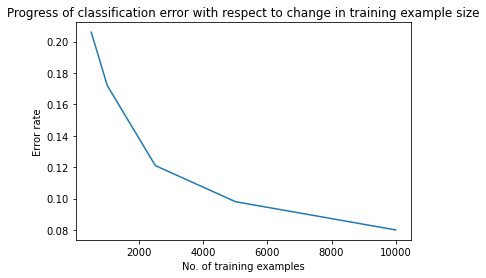

In [19]:
plt.plot(training_ex, classification_error);
plt.xlabel('No. of training examples')
plt.ylabel('Error rate')
plt.title('Progress of classification error with respect to change in training example size')

From the above graph it is evident that classification error rate is the lowest when the training examples size is 10000

#### 3.b) Report confusion matrix of the best model

In [20]:
#Confusion matrix of best model
trainingSet = train[:10000]

Xtrain = trainingSet.drop([0], axis= 1)
ytrain = trainingSet[0]
    
Xtest = testSet.drop([0], axis= 1)
ytest = testSet[0]
    
Xtrain= np.asarray(Xtrain)
ytrain= np.asarray(ytrain)

Xtest= np.asarray(Xtest)
ytest= np.asarray(ytest)
    
knn10k = kneighbors(k=2)
knn10k.fit(Xtrain, ytrain)
ypred = knn10k.predict_(Xtest)

print('Confusionn matrix of model with 10000 training examples(best model)')
print(confusion_matrix(ytest,ypred))

Confusionn matrix of model with 10000 training examples(best model)
[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 125   0   0   0   0   1   0   0   0]
 [  2   3 102   1   1   0   1   5   1   0]
 [  0   1   0  96   0   2   2   3   1   2]
 [  0   1   0   0  97   0   1   0   1  10]
 [  1   1   0   4   0  80   0   1   0   0]
 [  2   0   0   0   1   0  84   0   0   0]
 [  0   4   0   0   1   1   0  92   0   1]
 [  1   2   2   3   0   1   1   1  77   1]
 [  0   1   0   1   6   0   0   2   2  82]]
